In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [36]:
#Extração/Obtenção de Dados
tabela = pd.read_csv("barcos_ref.csv")
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [37]:
#Tratamento de Dados
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


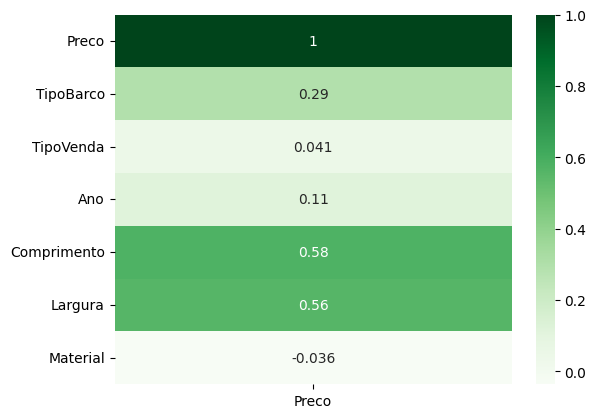

In [38]:
#Análise Exploratória
correlacao = tabela.corr()[["Preco"]]
display(correlacao)

sns.heatmap(correlacao, annot=True, cmap="Greens")
plt.show()

In [39]:
#Modelagem
y = tabela["Preco"]
x = tabela.drop("Preco", axis=1)
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state = 1)

In [40]:
#Treinamento da Inteligência Artificial
modelo_regressaoLinear = LinearRegression()
modelo_arvoreDecisao = RandomForestRegressor()

modelo_regressaoLinear.fit(x_treino, y_treino)
modelo_arvoreDecisao.fit(x_treino, y_treino)


RandomForestRegressor()

In [41]:
#Interpretação de Resultados
previsao_regressaoLinear = modelo_regressaoLinear.predict(x_teste)
previsao_arvoreDecisao = modelo_arvoreDecisao.predict(x_teste)

print(r2_score(y_teste, previsao_regressaoLinear))
print(r2_score(y_teste, previsao_arvoreDecisao))

0.4490324760735811
0.8500733214694254


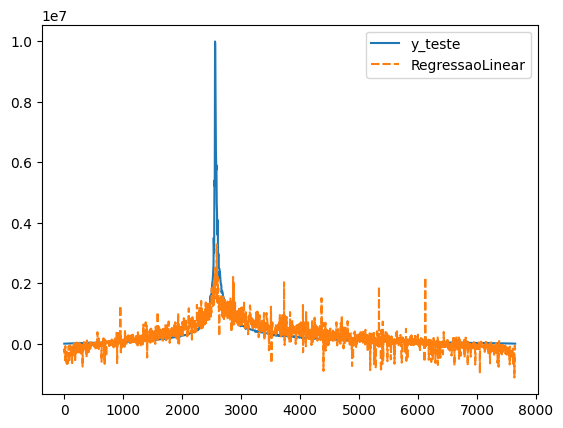

In [42]:
#Comparando Regressão Linear com "y_teste"
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["RegressaoLinear"] = previsao_regressaoLinear

sns.lineplot(data=tabela_auxiliar)
plt.show()

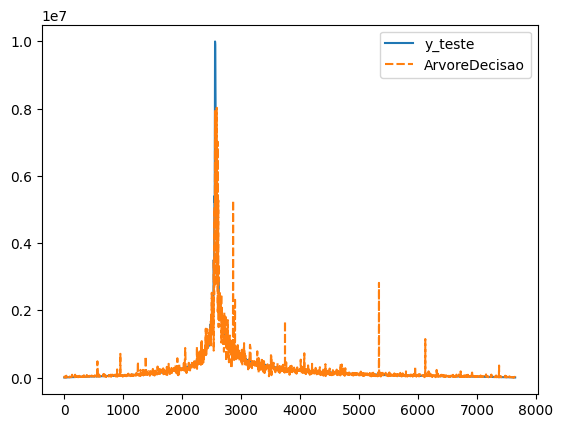

In [45]:
#Comparando Árvore de Decisão com "y_teste"
tabela_auxiliar2 = pd.DataFrame()
tabela_auxiliar2["y_teste"] = y_teste
tabela_auxiliar2["ArvoreDecisao"] = previsao_arvoreDecisao

sns.lineplot(data=tabela_auxiliar2)
plt.show()

In [48]:
#Utilizando a IA treinada com novos dados
tabela_nova = pd.read_csv("novos_barcos.csv")
display(tabela_nova)

nova_previsao = modelo_arvoreDecisao.predict(tabela_nova)
print(nova_previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 6201.7562381   9597.15619048 17345.9       ]
